In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data_set=pd.read_csv(r"C:\Users\Mantosh\Downloads\Copy of loan.csv")

In [3]:
data_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data_set=data_set.dropna()

In [9]:
data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data_set.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


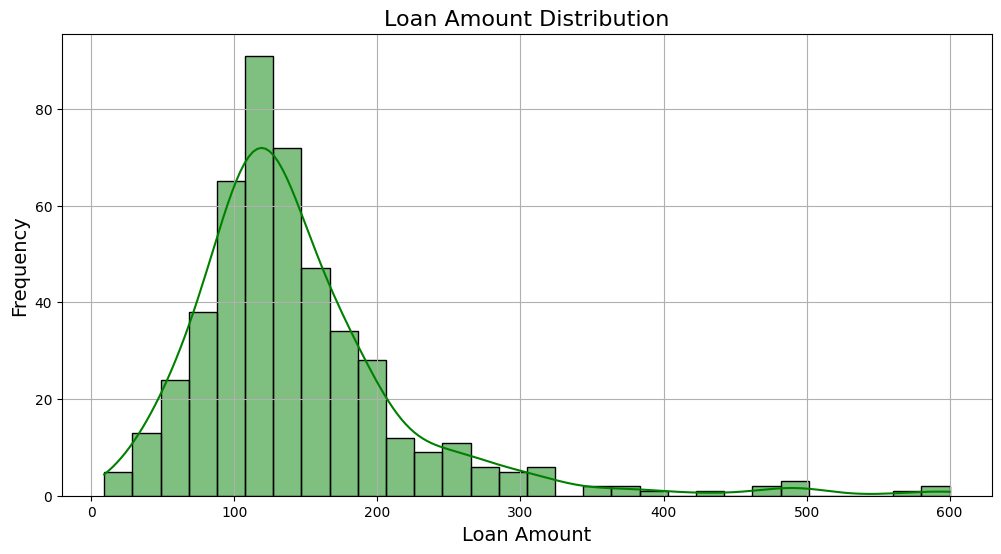

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data_set['LoanAmount'].dropna(), bins=30, kde=True, color='green', edgecolor='black')
plt.title('Loan Amount Distribution', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


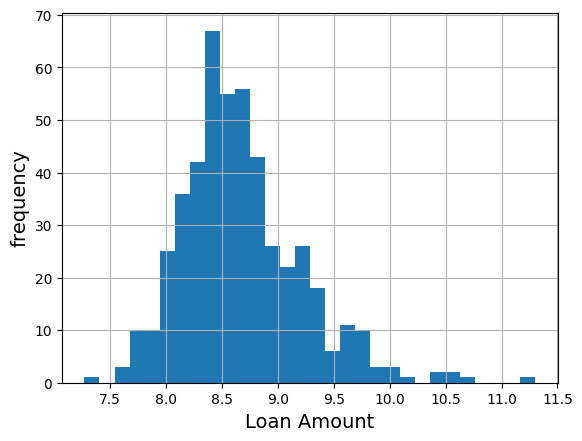

In [12]:
data_set['TotalIncome']=data_set['ApplicantIncome']+data_set['CoapplicantIncome']
data_set['TotalIncome_log']=np.log(data_set['TotalIncome'])
data_set['TotalIncome_log'].hist(bins=30)
plt.xlabel('Loan Amount' , fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
#replacing value of loan_status as y is 1 and n is 0
data_set.replace({'Loan_Status':{'Y':1 , 'N':0}}, inplace=True)

In [14]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,9613.0,9.170872


In [15]:
#try to see diffrent value in dependent column
data_set['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
data_set=data_set.replace(to_replace='3+',value=4)

In [17]:
data_set['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

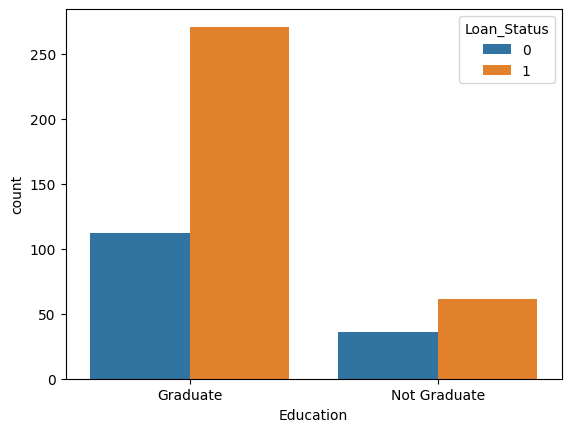

In [25]:
#education and loan status
sns.countplot(x='Education'  , hue='Loan_Status' , data=data_set)
plt.show()

<Axes: xlabel='Married', ylabel='count'>

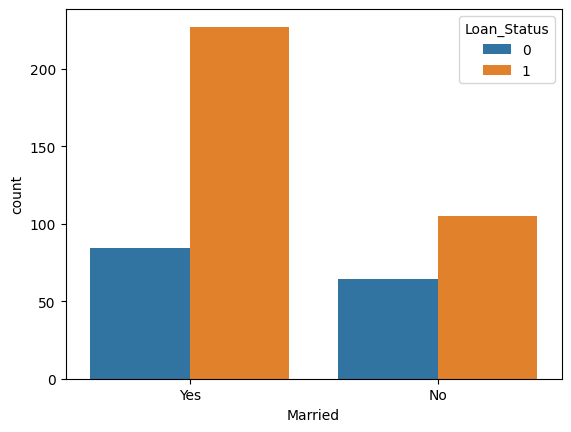

In [26]:
#martial status and loan status
sns.countplot(x='Married'  , hue='Loan_Status' , data=data_set)

<Axes: xlabel='ApplicantIncome', ylabel='count'>

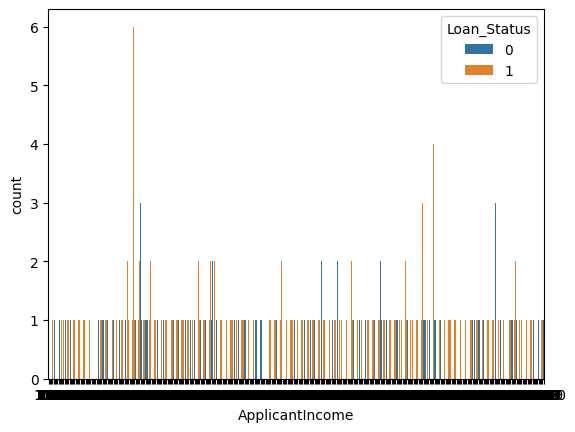

In [27]:
#Applicant income and loan staus 
sns.countplot(x='ApplicantIncome'  , hue='Loan_Status' , data=data_set)

In [29]:
#convert categorical  value into  nunmerical value
data_set=data_set.replace({'Married':{'Yes':1 , 'No':0}, 'Gender':{'Male':1,'Female':0}, 'Education':{'Graduate':1, 'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},
                           'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})
print(data_set)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [30]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0,9.170872


In [32]:
#separating data and label
X=data_set.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data_set['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train , Test and Split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [48]:
print(X.shape,X_train.shape,X_test.shape)

(480, 13) (432, 13) (48, 13)


train model:

support vector machine

In [51]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')


In [54]:
#Tranning the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [55]:
#accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [57]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.7453703703703703


In [58]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [59]:
print('accuracy on test data:',test_data_accuracy)

accuracy on test data: 0.8333333333333334


Making a prediction system


In [62]:
data_set.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0,9.170872


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Data
def load_data(data_set):
    data = pd.read_csv(data_set)
    return data

# Step 2: Data Preprocessing
def preprocess_data(data_set):
    # # Handle missing values
    # data.fillna(data_set.mean(), inplace=True)
    
    # # Encode categorical variables
    # le = LabelEncoder()
    # data['Gender'] = le.fit_transform(data['Gender'])
    
    # Feature Scaling
    scaler = StandardScaler()
    features = ['Education', 'Married	', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']
    data[features] = scaler.fit_transform(data_set[features])
    
    return data, scaler

Step 3: Split Data
def split_data(data_set):
    X = data_set.drop('Approval Status', axis=1)
    y = data_set['Approval Status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

Step 4: Train Model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

Step 5: Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')

# Step 6: Predict Loan Approval
def predict_loan_approval(model, scaler, new_data):
    new_data_scaled = scaler.transform(new_data[['Education', 'Married	', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']])
    prediction = model.predict(new_data_scaled)
    return 'Approved' if prediction[0] == 1 else 'Rejected'

# Main Function to Run the System
def main(data_set, new_applicant_data):
    # Load and preprocess data
    data = load_data(data_set)
    data, scaler = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(data)
    
    # Train model
    model = train_model(X_train, y_train)
    
    # Evaluate model
    evaluate_model(model, X_test, y_test)
    
    # Predict new applicant
    new_applicant_df = pd.DataFrame(new_applicant_data)
    approval_status = predict_loan_approval(model, scaler, new_applicant_df)
    print(f'Loan Approval Status for New Applicant: {approval_status}')

#Example usage
if __name__ == "__main__":
    data_set = 'loan_data.csv'
    new_applicant_data = {
        'Age': [30],
        'Income': [50000],
        'Credit Score': [700],
        'Loan Amount': [10000],
        'Loan Term': [36],
        'Gender': [1]  # Assuming 0 for Female, 1 for Male
    }
    
    main(file_path, new_applicant_data)

    

SyntaxError: invalid syntax (1386469529.py, line 28)